Path found: [1, 2, 3, 7, 8, 9]


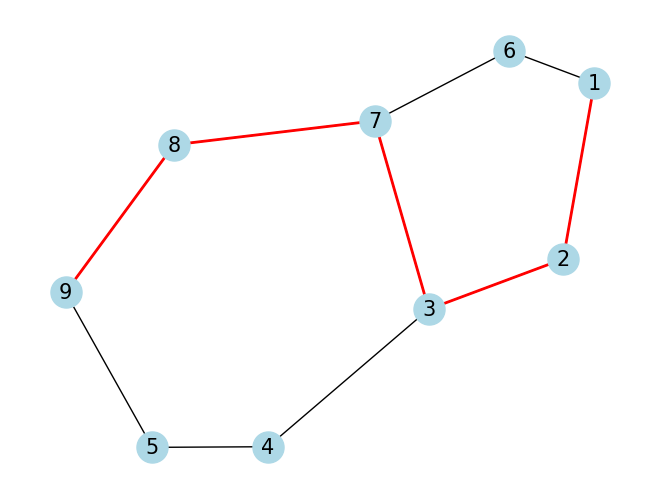

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def a_star_search(G, start, goal):

    def heuristic(node):
        return abs(node-goal)


    frontier = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            return reconstruct_path(came_from, start, goal)

        for neighbor in G.neighbors(current_node):
            new_cost = cost_so_far[current_node] + G[current_node][neighbor].get('weight', 1)
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node

    return None

def reconstruct_path(came_from, start, goal):
    path = []
    node = goal
    while node:
        path.append(node)
        node = came_from[node]
    return path[::-1]

def display_graph_and_path(G, path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
    if path:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    plt.show()

G = nx.Graph()
G.add_weighted_edges_from([
    (1, 2, 1), (2, 3, 2), (3, 4, 1), (4, 5, 3),
    (1, 6, 5), (6, 7, 2), (7, 8, 1), (8, 9, 1),
    (5, 9, 1), (3, 7, 1)
])

start_node, goal_node = 1, 9
path = a_star_search(G, start_node, goal_node)
print("Path found:", path)
display_graph_and_path(G, path)